In [1]:
import pandas as pd
import numpy as np
import cPickle
import gzip

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from wordcloud import WordCloud
from hlda.sampler import HierarchicalLDA

DATA_PATH = '../data'

In [2]:
# Data Read
data_file = '{}/02pre_lattes.pkl.xz'.format(DATA_PATH)
%time df = pd.read_pickle(data_file, compression='xz')
print('{} docs shape'.format(df.shape))
df.head(5)

CPU times: user 1.24 s, sys: 125 ms, total: 1.36 s
Wall time: 1.37 s
(172163, 6) docs shape


,id,titulo,clean,ano,wct,wcc
0,101982954114164,3D reconstruction methods for digital preserva...,"[3d, reconstruct, method, digit, preserv, cult...",2014,11,8
1,101982954114164,3D Viewer Software Build Based on Scanned Synt...,"[3d, viewer, softwar, build, base, scan, synth...",2016,12,11
2,102488447573085,The Globalization Strategy of a High-Tech Mult...,"[global, strategi, high, tech, multin, corpor,...",1996,18,12
3,102488447573085,Information Systems as an Instrument of Qualit...,"[inform, system, instrument, qualiti, program,...",2000,11,7
4,102488447573085,The Experience of a Cardiology Unit in the Dev...,"[experi, cardiolog, unit, develop, qualiti, pr...",2002,17,10


In [3]:
texts = list(df.clean.values)

corpus = []
all_docs = []
vocab = set()

for doc in texts:
    words = []
    title = ' '.join(doc)
    all_docs.append(title)

    for w in doc:
        words.append(w)

    vocab.update(words)
    corpus.append(words) 


In [4]:
vocab = sorted(list(vocab))
vocab_index = {}
for i, w in enumerate(vocab):
    vocab_index[w] = i

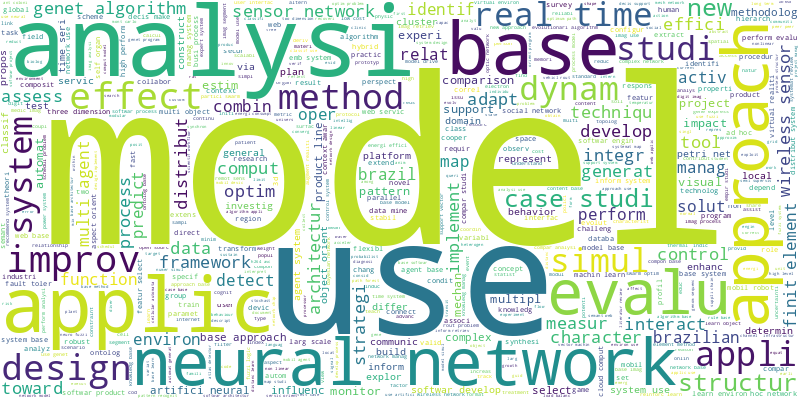

In [5]:
wordcloud = WordCloud(
                width=800, 
                height=400,
                background_color="white",
                max_words=5000,
                contour_width=3,
                contour_color='steelblue'
                ).generate(' '.join(all_docs))

wordcloud.to_image()

In [6]:
new_corpus = []
for doc in corpus:
    new_doc = []
    for word in doc:
        word_idx = vocab_index[word]
        new_doc.append(word_idx)
    new_corpus.append(new_doc)

In [7]:
n_samples = 500       # no of iterations for the sampler
alpha = 10.0          # smoothing over level distributions
gamma = 1.0           # CRP smoothing parameter; number of imaginary customers at next, as yet unused table
eta = 0.1             # smoothing over topic-word distributions
num_levels = 3        # the number of levels in the tree
display_topics = 50   # the number of iterations between printing a brief summary of the topics so far
n_words = 5           # the number of most probable words to print for each topic after model estimation
with_weights = False  # whether to print the words with the weights

In [8]:
hlda = HierarchicalLDA(
    new_corpus,
    vocab,
    alpha=alpha,
    gamma=gamma,
    eta=eta,
    num_levels=num_levels)

hlda.estimate(
    n_samples,
    display_topics=display_topics,
    n_words=n_words,
    with_weights=with_weights)

HierarchicalLDA sampling

..

KeyboardInterrupt: 

In [ ]:
def save_zipped_pickle(obj, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        cPickle.dump(obj, f, protocol)
        
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = cPickle.load(f)
        return loaded_object

In [ ]:
save_zipped_pickle(hlda, '{}/hlda_lattes.pkl'.format(DATA_PATH))